##  1 Описание проекта 
 
  В нашем распоряжении данные, полученные  из множества источников, включая опросы, сайты по размещению вакансий и другие общедоступные источники.
  Цель исследования: исследовать какие факторы больше всего влияют на размер заработной платы и сформировать рекомендации для заказчика. 

## 2 Описание данных 

 Необходимые данные расположены на сайте kaggle: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data 
 
 Всего в датафрейме 6 столбцов: 
 
 * Age - возраст сотрудника;
 * Gender - пол;
 * Education level - уровень образования;
 * Job title - должность; 
 * Years of Experience - опыт работы в годах; 
 * Salary - заработная плата 
 
 Ход исследования содержит следующие этапы: 
 
 1. Загрузка данных и изучение общей информации 
 2. Предобработка данных 
 3. Исследовательский анализ данных 
 4. Проверка статистических гипотез и обоснование выбора статистического теста 
 5. Общие выводы и выработка рекомендаций 

##  1 Загрузка данных и изучение общей информации

Загрузим необходимые библиотеки, которые понадобятся для работы.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math as mt 
import plotly.graph_objects as go 
import plotly.express as px 
from scipy import stats as st 

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\Salary_Data.csv')

In [3]:
# Посмотрим на соедржимое датасета. Выведем первые пять строк
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# выведем последние пять строк 
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [5]:
# посомтрим на размер датасета 
data.shape

(6704, 6)

In [6]:
# выведем случайным образом 10 строк 
data.sample(random_state=1, n = 10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2192,33.0,Male,Bachelor's Degree,Full Stack Engineer,7.0,130000.0
2544,23.0,Female,High School,Back end Developer,2.0,62807.0
2328,41.0,Female,PhD,Director of Data Science,16.0,200000.0
4032,43.0,Male,PhD,Data Scientist,16.0,160000.0
5759,29.0,Male,Bachelor's Degree,Product Manager,5.0,80000.0
1615,43.0,Male,PhD,Senior Project Engineer,13.0,185000.0
4605,27.0,Female,Bachelor's Degree,Web Developer,2.0,50000.0
2740,42.0,Male,Master's Degree,Product Manager,14.0,180000.0
1163,30.0,Male,Master's,Software Engineer,6.0,170000.0
3067,54.0,Male,Bachelor's Degree,Full Stack Engineer,25.0,179756.0


In [7]:
# изучим общую информацию о датасете 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


   Всего 6704 строк и 6 столбцов. 3 столбца принадлежат к вещественному типу данных float('age','years of experience','salary'). 
   
3 столбца принадлежат к типу данных object('gender', 'education level', 'job title'). Общий объем данных составил 314.4 КB.

   Вывод:  В первом шаге исследования изучили общую информацию о датасете, поменяли тип данных, там где было необходимо, поменяли названия столбцов, обнаружили, что объем данных составил 314.4 КB. 

В дальнейшем шаге исследования будем заниматься предобработкой данных  

##  2 Предобработка данных 

In [8]:
# посмотрим на названия столбцов датасета data 
data.columns 

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [9]:
# Приведем названия столбцов на нижний регистр 
data.columns = [x.lower() for x in data.columns] 
data

,age,gender,education level,job title,years of experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [10]:
# Приведем названия к столбцов к змиеному регистру 
data = data.rename(columns = {'education level':'education_level','job title':'job_title','years of experience':'years_of_experience'})
data

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [11]:
# посмотрим на типы данных 
data.dtypes 

age                    float64
gender                  object
education_level         object
job_title               object
years_of_experience    float64
salary                 float64
dtype: object

In [12]:
# Для столбца age поменяем тип данных на integer. 

data['age'] = data['age'].astype('Int64') 

In [13]:
data.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,15.0,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [14]:
# Проверим датасет на наличие пропусков 
data.isna().sum()

age                    2
gender                 2
education_level        3
job_title              2
years_of_experience    3
salary                 5
dtype: int64

In [15]:
# Удалим пропуски с помощью метода dropna

data = data.dropna()
data

,age,gender,education_level,job_title,years_of_experience,salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,15.0,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49,Female,PhD,Director of Marketing,20.0,200000.0
6700,32,Male,High School,Sales Associate,3.0,50000.0
6701,30,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [16]:
# Проверка на удаление пропусков
data.isna().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

In [17]:
# Проверим на наличие дубликатов 
data.duplicated().sum()

4911

In [18]:
data[data.duplicated(['age'], keep = False)].sort_values(by='age')

,age,gender,education_level,job_title,years_of_experience,salary
5057,21,Female,High School,Junior Sales Representative,0.0,25000.0
5122,21,Female,High School,Junior Sales Representative,0.0,25000.0
5109,21,Female,High School,Junior Sales Representative,0.0,25000.0
5096,21,Female,High School,Junior Sales Representative,0.0,25000.0
5083,21,Female,High School,Junior Sales Representative,0.0,25000.0
...,...,...,...,...,...,...
1225,62,Male,PhD,Software Engineer Manager,19.0,200000.0
1258,62,Male,PhD,Software Engineer Manager,19.0,200000.0
1236,62,Male,PhD,Software Engineer Manager,20.0,200000.0
1305,62,Male,PhD,Software Engineer Manager,19.0,200000.0


   Проверить являются ли одинаковые строки дубликатами довольно сложно, так как отсутствует уникальный идентификатор. Будем считать что каждая строка в таблице это информация об отдельном человеке

Вывод по предобработке данных:  

   Во втором шаге исследования привели названия столбцов к нижнему регистру, поменяли тип данных, где было необходимо и исследовали датасет на наличие пропущенных значений и дубликатов. 

## 3 Исследовательский анализ данных 

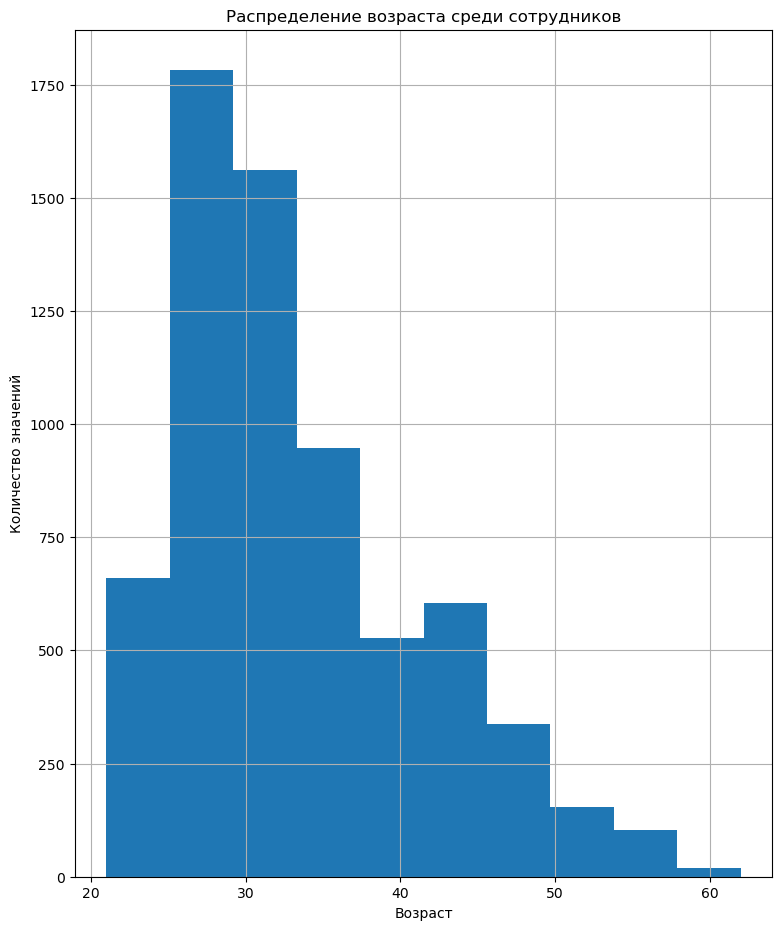

In [19]:
# посмотрим на распределение возраста 

plt.figure(figsize=(9,11))
data['age'].hist() 
plt.xlabel('Возраст')
plt.ylabel('Количество значений')
plt.title('Распределение возраста среди сотрудников')
plt.show() 


In [20]:
data['age'].describe().round()

count    6698.0
mean       34.0
std         8.0
min        21.0
25%        28.0
50%        32.0
75%        38.0
max        62.0
Name: age, dtype: Float64

Средний возраст составил 34 года, медиана составила 32 года. Самому молодому сотруднику 21 год, самому зрелому - 62 года.

In [21]:
# посмотрим на распределение сотрудников по полу 

gender_count = data['gender'].value_counts()
gender_count

Male      3671
Female    3013
Other       14
Name: gender, dtype: int64

In [22]:
# посмотрим на сотрудников, которые принадлежат к мужчинам и женщинам. 
data[data['gender'] == 'Other']

,age,gender,education_level,job_title,years_of_experience,salary
2378,53,Other,High School,Senior Project Engineer,31.0,166109.0
2385,25,Other,High School,Full Stack Engineer,2.0,69032.0
2406,37,Other,Master's Degree,Full Stack Engineer,14.0,161393.0
2448,31,Other,High School,Back end Developer,8.0,104127.0
2454,23,Other,High School,Front end Developer,2.0,62852.0
2458,53,Other,High School,Senior Project Engineer,31.0,166109.0
2465,25,Other,High School,Full Stack Engineer,2.0,69032.0
2486,37,Other,Master's Degree,Full Stack Engineer,14.0,161393.0
2528,31,Other,High School,Back end Developer,8.0,104127.0
2534,23,Other,High School,Front end Developer,2.0,62852.0


<Figure size 1000x1000 with 0 Axes>

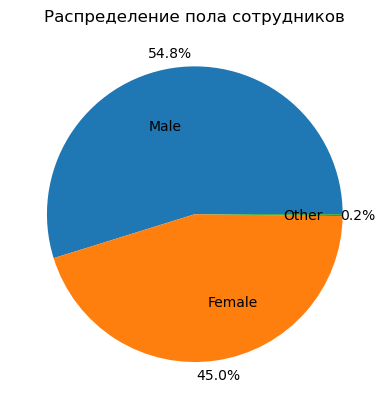

In [23]:
# Построим круговую диаграмму 

plt.figure(figsize = (10,10)) 

fig, ax = plt.subplots() 

sizes = data['gender'].value_counts()
labels = gender_count.index
ax.pie(sizes, labels = labels, autopct='%1.1f%%', pctdistance =1.1, labeldistance =.6)
ax.set_title('Распределение пола сотрудников')

plt.show()



 Среди сотрудников: 54.8 % - мужчины, 45 % - женщины и 0.2 % принадлежат к категории  'Другие'

In [24]:
# посмотрим уровень образования среди сотрудников
education_level_df = data['education_level'].value_counts() 
education_level_df = education_level_df.reset_index()
education_level_df.columns = ['education_level', 'count'] 
# удалим последнюю строку
education_level_df =  education_level_df.drop(6) 
education_level_df

,education_level,count
0,Bachelor's Degree,2265
1,Master's Degree,1572
2,PhD,1368
3,Bachelor's,756
4,High School,448
5,Master's,288


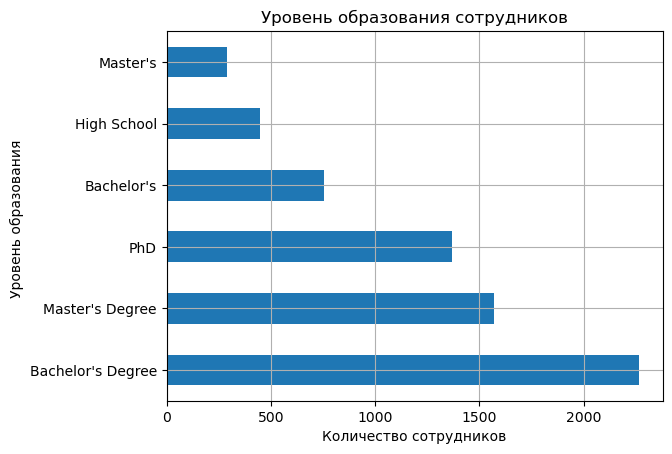

In [25]:
# Построим барплот 
education_level_df.plot(kind = 'barh', grid = True, x = 'education_level', y = 'count', legend = False)

plt.xlabel('Количество сотрудников')
plt.ylabel('Уровень образования ')
plt.title('Уровень образования сотрудников')

plt.show()

   Большинство сотрудников имеют степень бакалавра (2265 человек), 1572 сотрудника имеют степень магистра, 1368 сотрудников имеют степень доктора философии, 756 сотрудников являются бакалаврами, 448 сотрудников из высшей школы,  288 - магистры 

<Axes: ylabel='education_level'>

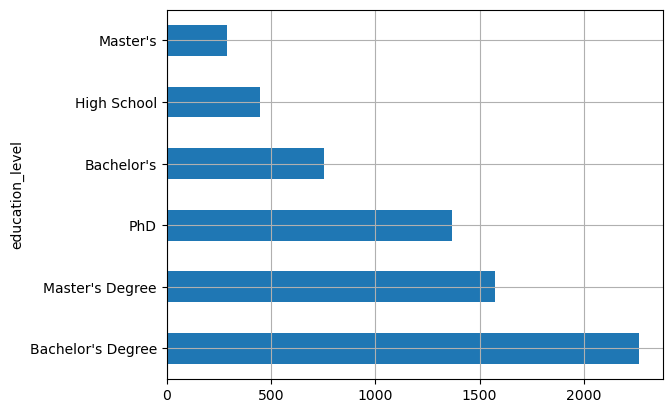

In [26]:
education_level_df.plot(kind = 'barh', grid = True, x = 'education_level', y = 'count', legend = False)

In [27]:
education_level_df['education_level'].value_counts(normalize = True).round(2)

Bachelor's Degree    0.17
Master's Degree      0.17
PhD                  0.17
Bachelor's           0.17
High School          0.17
Master's             0.17
Name: education_level, dtype: float64

В относительном выражении распределение сотрудников по уровню образования прошло равномерно

In [28]:
# посмотрим суммарное количество должностей  сторудников 
data['job_title'].nunique()

191

In [29]:
# Посмотрим на топ-10 популярных должностей сотрудников 

top_10 = data['job_title'].value_counts().sort_values(ascending= False).reset_index()
top_10.columns = ['job_title','count']
top_10 = top_10[0:10]
top_10

,job_title,count
0,Software Engineer,518
1,Data Scientist,453
2,Software Engineer Manager,376
3,Data Analyst,363
4,Senior Project Engineer,318
5,Product Manager,313
6,Full Stack Engineer,308
7,Marketing Manager,255
8,Back end Developer,244
9,Senior Software Engineer,244


В 10 самых популярных должностей по количеству сотрудников вошли : 

* Software Engineer (518 сотрудников), 
* специалист по Data Scientist (453 сотрудников), 
* Software Engineer Manager(376 сотрудника), 
* Data Analyst(363 сотрудника),
* Senior Project Engineer (318 сотрудников), 
* Product Manager (313 сотрудников), 
* Full Stack Engineer (308 сотрудников), 
* Marketing Manager (255 сотрудников), 
* Back end Developer (244 сотрудникка), 
* Senior Software Engineer (244 сотрудника) 



Text(0, 0.5, 'Количество сотрудников')

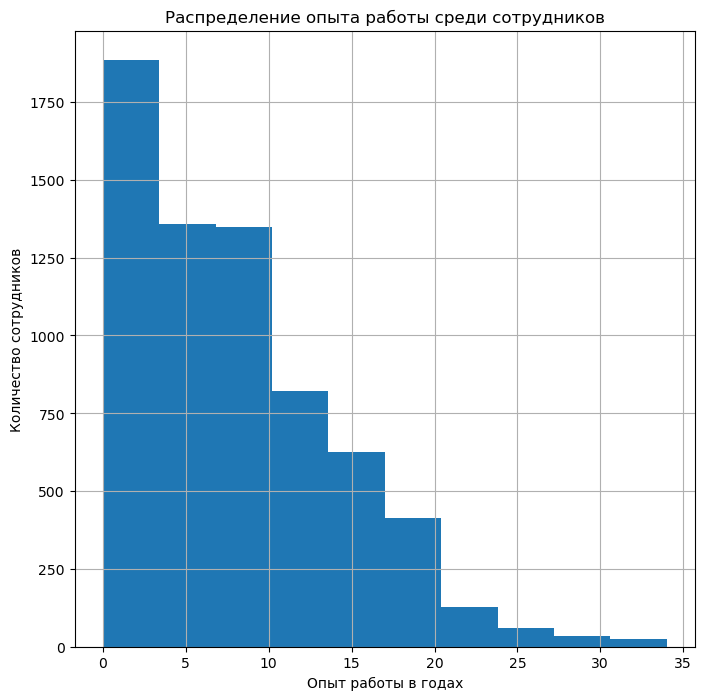

In [30]:
# построим гистограмму распределения опыта работы 
plt.figure(figsize=(8,8))
data['years_of_experience'].hist()
plt.title('Распределение опыта работы среди сотрудников')
plt.xlabel('Опыт работы в годах')
plt.ylabel('Количество сотрудников')

Опыт работы сотрудниеов не имеет вид нормального распределения.

<Axes: xlabel='years_of_experience', ylabel='Proportion'>

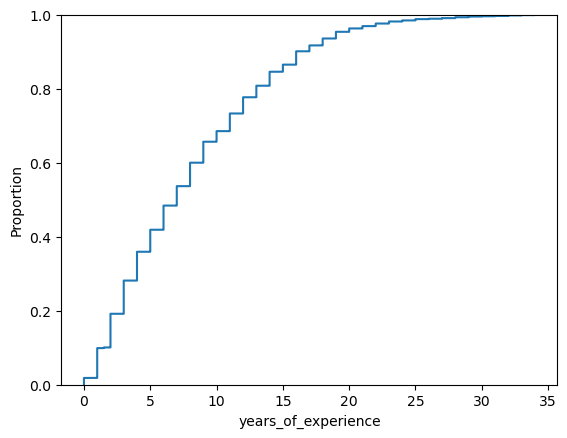

In [31]:
# Построим ecdfplot
sns.ecdfplot(data = data, x = 'years_of_experience', stat = 'proportion') 

По графику ecdfplot можно заметить, какой процент значений меньше для каждого выбранного значения опыта работы 

In [32]:
data['years_of_experience'].describe().round().astype('int32')


count    6698
mean        8
std         6
min         0
25%         3
50%         7
75%        12
max        34
Name: years_of_experience, dtype: int32

   Среднее количество лет опыта равно 8 годам, медиана примерно равна среднему значению и составила 7 лет. Минимальное количество лет опыта - 0, максимальное количество лет опыта составило 34 года 

In [33]:
# количество уникальных значений по признаку years_of_experience 
data['years_of_experience'].nunique()

37

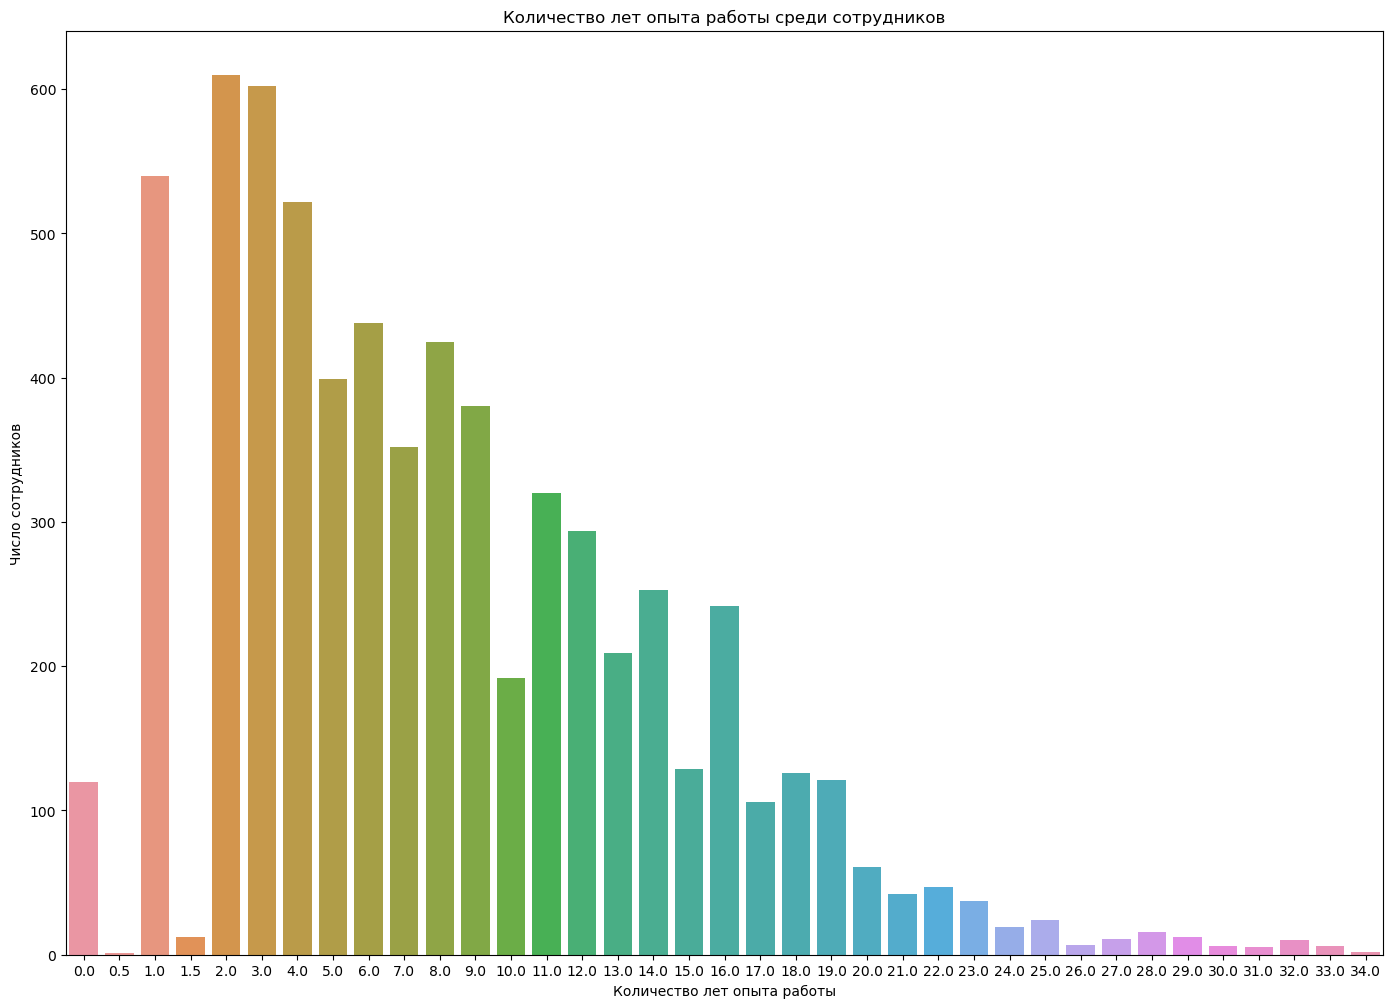

In [34]:
# Посмотрим на распределение опыта работы среди сотрудников  
plt.figure(figsize=(17,12)) 

sns.countplot(data = data, x = 'years_of_experience') 
plt.title('Количество лет опыта работы среди сотрудников')
plt.xlabel('Количество лет опыта работы')
plt.ylabel('Число сотрудников')
plt.show() 

   По данным графика, можно заметить, что есть два пика - 2 и 3 года опыта работы, далее постепенно с увеличением количества лет опыта число сотрудников потепенно понижается. Как и ожидалось, число опытных сотрудников(более 20 лет) довольно мало по сравнению с количеством сотрудников, имеющих опыт работы до 10 лет.

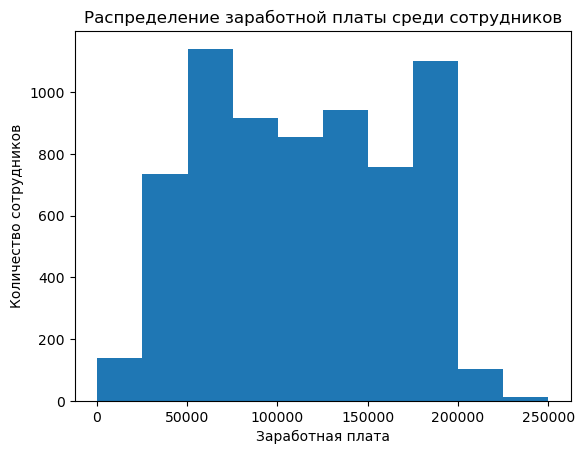

In [35]:
# Построим boxplot для признака salary 
plt.hist(data = data , x = 'salary')
plt.title('Распределение заработной платы среди сотрудников')
plt.xlabel('Заработная плата')
plt.ylabel('Количество сотрудников')
plt.show() 


In [36]:
data['salary'].describe().round(2)

count      6698.00
mean     115329.25
std       52789.79
min         350.00
25%       70000.00
50%      115000.00
75%      160000.00
max      250000.00
Name: salary, dtype: float64

Максимальная зарплата составила 250000 у.е. Средняя зарпалат равна медианной и составила 115000 рублей. Межквартильный размах составил 90000 рублей.

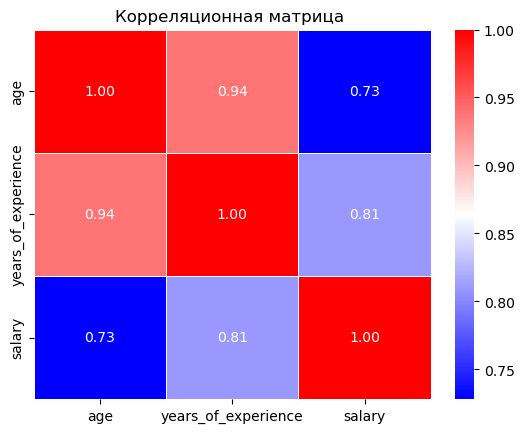

In [37]:
# Построим тепловую карту heatmap
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'bwr', linewidth = .5) 
plt.title('Корреляционная матрица ')
plt.show()  


   По данным тепловой карты можно установить положительную сильную связь между возрастом сотрудника и его опытом работы. Логично, что чем старше человек, тем больше у него опыта работы . 
   
   Согласно шкале Чеддока, между заработной платой и возрастом сотрудника наблюдается высокая положительная связь (0.73). Между заработной платой и опытом работы также можно заметить положительную высокую связь (0.81) 

In [38]:
data.groupby('gender')['age'].agg('nunique')

gender
Female    38
Male      40
Other      6
Name: age, dtype: int64

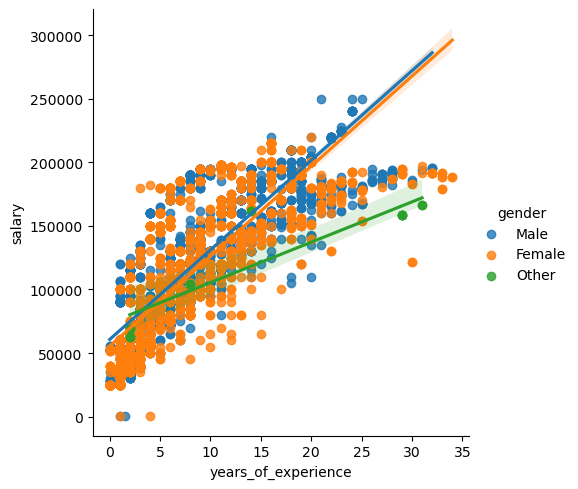

In [39]:
sns.lmplot(x='years_of_experience', y='salary', data=data, hue = 'gender')

   По графику можно заметить, что зарплата напрямую зависит от опыта работы. Это одинаково верно как для мужчин, так и для женщин и категории 'Другие' 

In [40]:
ed_level_salary = data.groupby('education_level')['salary'].agg('median').reset_index() 
ed_level_salary.columns = ['education_level', 'median_salary']
ed_level_salary

,education_level,median_salary
0,Bachelor's,130000.0
1,Bachelor's Degree,75000.0
2,High School,30000.0
3,Master's,177500.0
4,Master's Degree,122000.0
5,PhD,170000.0
6,phD,120000.0


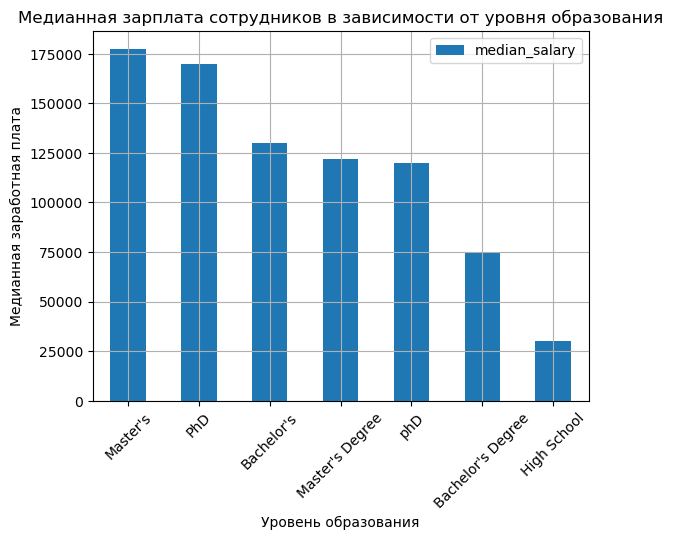

In [41]:
ed_level_salary.sort_values(by = 'median_salary',ascending = False).plot(kind='bar', grid = True,  x = 'education_level', y ='median_salary')
plt.title('Медианная зарплата сотрудников в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная заработная плата')
plt.xticks(rotation = 45)
plt.show()

   Наибольшая медианная зарплата у сотрудников с образованием магистра, далее на втором месте сотрудники со степенью доктора философии, на третьем месте - сотрудники, закончившие бакалавриат.

Вывод по исследовательскому анализу данных: 

* была построена тепловая карта , по результатам которой установлено, что заработная плата напрямую коррелирует с возрастом и опытом работы; 
* также определили, что наибольшая медианная зарплата у сотрудников, имеющих степень магистра и доктора философских наук
* среди сотрудников 54.8 % мужчины, 45 % женщины и 0.2 % относятся к категории 'Другие' 
* средний возраст сотрудников составил 34 года 
* средняя заработная плата сотрудников равна медианной заработной плате и составила 115000 у.е. 


## 4 Проверка статистических гипотез и обоснование выбора статистического теста 

Проверим гипотезу различия заработной платы между сотрудниками мужского и женского пола 

Сформулируем гипотезы: 

Нулевая гипотеза (Н0) : средняя заработная плата мужчин равна средней заработной плате женщин

Альтернативная гипотеза (Н1): средняя заработная плата мужчин не равна средней заработной плате женщин 





In [42]:
# Cформируем контрольную и экспериментальную выборки 

sample_1 = data[data['gender'] == 'Male']['salary']
sample_2 = data[data['gender'] == 'Female']['salary']


In [43]:
len(sample_1)

3671

In [44]:
len(sample_2)

3013

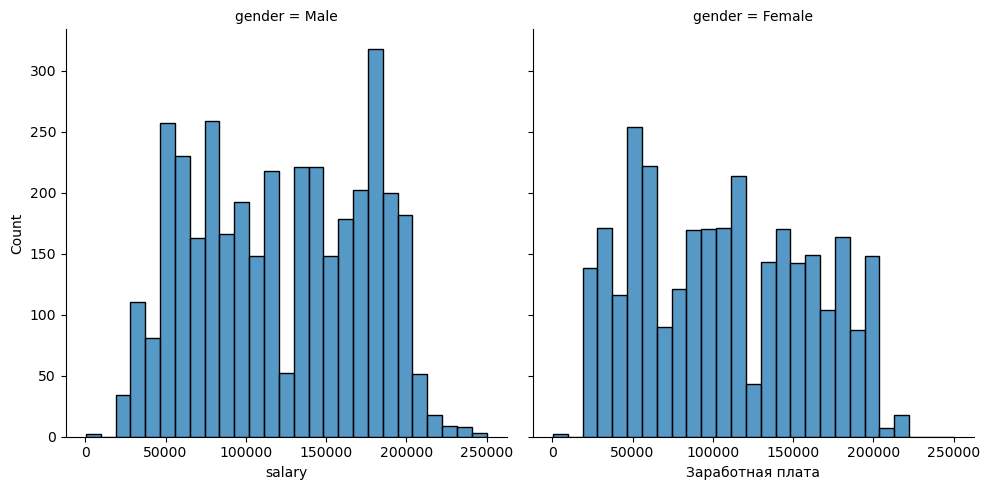

In [45]:
# Проверим из какого распределения пришли выборки и присутствуют выбросы. Выберем статистический тест
sns.displot(data.query('gender == ["Male","Female"]'), x = 'salary', col = 'gender') 
plt.xlabel('Заработная плата')
plt.ylabel('Количество сотрудников')
plt.show()
     


   Выборки пришли не из нормального распределения, есть длинные хвосты в сторону больших значений. Применим U-критерий Манна-Уитни , который менее подвержен выбросам. 

In [46]:
results = st.mannwhitneyu(sample_1, sample_2, alternative = 'two-sided') 

# критический уровень статистической значимости 
alpha = 0.05

print('Pvalue:', results.pvalue) 

if results.pvalue < alpha: 
    
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу') 
    

Pvalue: 7.454164887275822e-25
Отвергаем нулевую гипотезу


 Вывод: Получившееся значение p_value < 0.05. Следовательно, на имеющихся данных на уровне значимости 5 %(уровне доверия 95 %) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя заработная плата мужчин не равна средней заработной плате женщин 

Вывод по проверке статистических гипотез: есть статистически значимая разница между средней заработной платой мужчин и женщин 

## Общие выводы и выработка рекомендаций 

В ходе выполнения пет проекта были изучены и решены цели исследования. Ход исследования содержал 4 шага.
 1. на первом шаге исследования была изучена общая информация о наборе данных, установили, что всего датасет содержит 6 столбцов и 6704 строк; 
 2. на втором шаге исследования была проведена предобработка данных. Удалены пропущенные значения, была проведена проверка на дубликаты, привели названия столбцов к нижнему регистру 
 3. на третьем шаге исследования был проведен EDA: 
   * была построена тепловая карта , по результатам которой установлено, что заработная плата напрямую коррелирует с возрастом и опытом работы;
   * также определили, что наибольшая медианная зарплата у сотрудников, имеющих степень магистра и доктора философских наук
   * среди сотрудников 54.8 % мужчины, 45 % женщины и 0.2 % относятся к категории 'Другие'
   * средний возраст сотрудников составил 34 года
   * средняя заработная плата сотрудников равна медианной заработной плате и составила 115000 у.е.
 4. на четвертом шаге исследования была проведена проверка статистической гипотезы о различии средней заработной платы между сотрудниками мужского и женского пола, в результате которой обнаружили, что есть статистически значимая разница между зарплатами мужчин и женщин 

  По результатам проведенного исследования можно дать рекомендации для заказчика: соискатели вакансий в сфере IT. 
  1. заработная плата зависит от опыта работы. Рекомендовать кандидату на вакансию ориентироваться на свой релевантный опыт и трезво оценивать зарплатные ожидания 
  2. самая высокая медианная заработная плата у сотрудников, имеющих степень магистра и доктора философских наук. Рекомендовать кандидатам ориентироваться на уровень образования и улучшать повседневно свои навыки и знания для повышения шансов на оффер.